<a href="https://colab.research.google.com/github/Swaghanaian/Heart-Disease/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.decomposition import PCA

# **Loading Data**

Heart Failure Dataset

Data Source

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

In [ ]:
df_heart = pd.read_csv('/content/heart.csv')
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Brief Description of Dataset from Kaggle

The data contains 918 observations with 12 attributes for causing Heart disease.

**Target**

To predict occurence of Heart disease based on 12 attributes or features

**Classification or Regression Problem**

This is a Classification problem

# **Data Inspection & Cleaning**

**Features and Rows of Dataset**

In [ ]:
#To inspect features and rows of the dataset
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Has 12 Columns and 917 rows

In [ ]:
#To check for missing data
df_heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#To check for duplicates
df_heart.duplicated().sum() #No duplicates exist

0

In [ ]:
#View statistical representation of data to research outliers
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There seems to be outliers in the dataset as 0 is not a valid cholesterol reading.

In [ ]:
#Finding the average cholesterol input to replace instances of 0
cho_mean = df_heart['Cholesterol'].mean()

In [ ]:
#Using the average cholesterol input to replace instances of 0
df_heart['Cholesterol'] = df_heart['Cholesterol'].replace(0, cho_mean)
df_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [ ]:
#Verifying there are no instances of 0 in the Cholesterol column
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,236.047413,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,56.240952,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,198.799564,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#To check data categories
for col in df_heart.select_dtypes('object'):
  print(df_heart[col].value_counts())

M    725
F    193
Name: Sex, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


There are no inconsistencies in the data categories

In [ ]:
#For categorical data statistics
df_heart.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


# **Data Visualization**

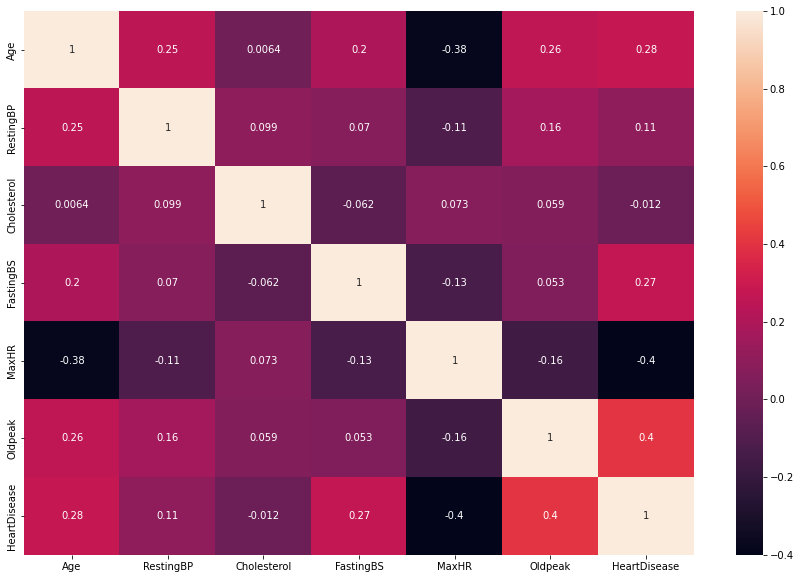

In [ ]:
#To visualize correlation between Heart disease and other features
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_heart.corr(), annot= True, ax=ax)

Shows high correlation of Age,FastinBS and Oldpeak to Heartdisease.

Also shows a negative correlation of MaxHR to Heartdisease

### **Creating Two visuals to demonstrate key findings of interest to a Stakeholder**

Text(6.674999999999997, 0.5, 'ST depression')

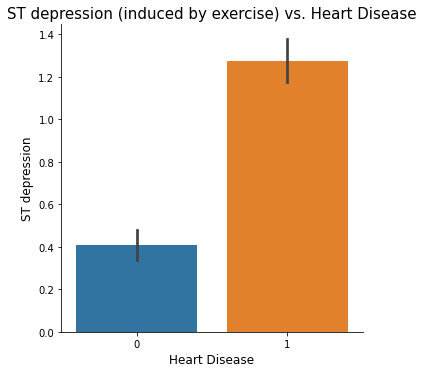

In [ ]:
#To plot a barplot representing the relationship between ST depression and Heart Disease
sns.catplot(x="HeartDisease", y="Oldpeak", kind="bar", data=df_heart);

plt.title('ST depression (induced by exercise) vs. Heart Disease',size=15)
plt.xlabel('Heart Disease',size=12)
plt.ylabel('ST depression',size=12)

The graph above is showing the distribution of the oldpeak feature relative to heart disease. The oldpeak features refers to the ST depression induced by exercise relative to rest. This is the stress caused by the amount of effort exerted in exercise or physical activity. The results from the dataset shows a positive correlation between this feature and Heart Disease. Patients with higher level of oldpeak can be advised to reduce the amount of effort exerted in exercise or physical activity they are currently partaking in to reduce the risk of getting Heart Disease.

Text(0, 0.5, 'HeartDisease')

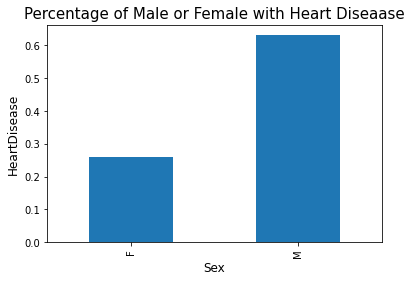

In [ ]:
#To plot Percentage of Heart disease by gender

#Percentage of Heart disease by gender
df_groups = df_heart.groupby('Sex')['HeartDisease'].mean()

#create bar plot by group
df_groups.plot(kind='bar')

plt.title('Percentage of Male or Female with Heart Diseaase',size=15)
plt.xlabel('Sex',size=12)
plt.ylabel('HeartDisease',size=12)

The graph above shows the percentage of Male and Female with Heart Disease. From the dataset provided, about 64% of the Male instances have Heart Disease and 26% of the Female instances have Heart Disease. Maybe Male patients should be advised to schedule appointments regularly to assess their risk for Heart Disease.

### **To plot a graph showing the relationship between Age and Heart Disease**

In [ ]:
#Creating variables for Age distribution

def bin_Age(Age):
  if Age < 45:
    return '0-45'
  elif Age < 50:
    return '45-50'
  elif Age < 55:
     return '50-55'
  elif Age < 60:
     return '55-60'
  elif Age < 65:
    return '60-65'
  elif Age < 70:
    return '65-70'
  else:
    return '70+'

In [ ]:
#To apply Bin function for Age with a new column
df_heart['Age_Bin']= df_heart['Age'].apply(bin_Age)

#Verifying new column was created
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Bin
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,0-45
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,45-50
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,0-45
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,45-50
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,50-55


Text(0, 0.5, 'HeartDisease')

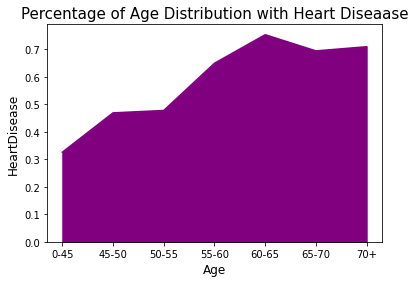

In [ ]:
#Using Groupby to plot the Percentage of Age Distribution with Heart Disease
df_groups1 = df_heart.groupby('Age_Bin')['HeartDisease'].mean()

df_groups1.plot(kind='area', color= 'purple')

plt.title('Percentage of Age Distribution with Heart Diseaase',size=15)
plt.xlabel('Age',size=12)
plt.ylabel('HeartDisease',size=12)

The Age distribution above shows that the risk of Heart Disease increases as patients age. To reduce these risks Patients 45 and older can be advised to adopt healthier lifestyles like eating healthy, getting regular exercise and being on a lower fat diet to reduce the risk of getting Heart Disease.

# **Identify target vector and feature matrix**

In [ ]:
X = df_heart.drop(columns = ['HeartDisease'])
y = df_heart['HeartDisease']

# **Train Test Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)

# **Preprocessing Data**

In [ ]:
#To select categorical features(columns).
cat_feat = make_column_selector(dtype_include = 'object')
#To select all of the quantitative/numerical features (columns)
quant_feat = make_column_selector(dtype_include = 'number')

#instatiate OneHotEncoder to convert categorical data to numberical
ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
#Scale the data to be ready for modeling
scaler = StandardScaler()

#Making Tuples
num_tuple = (scaler, quant_feat)
cat_tuple = (ohe, cat_feat)

#Making Column transformer to transform the appropriate columns
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')




# **Using the KNN Model**

In [ ]:
# make and fit a pipe
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(column_transformer, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Predict KNN model
%%time
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

CPU times: user 88.4 ms, sys: 55.2 ms, total: 144 ms
Wall time: 94.5 ms


In [ ]:
# Evaluate default KNN model 
print('Accuracy of Train set', accuracy_score(y_train, knn_train_preds))
print('Accuracy of Test set', accuracy_score(y_test, knn_test_preds))

Accuracy of Train set 0.8968023255813954
Accuracy of Test set 0.8260869565217391


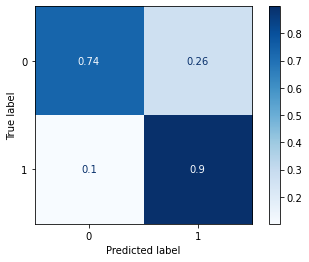

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,knn_test_preds, cmap = 'Blues',normalize='true');

This model shows that there are 26% false positives and 10% False negatives. This is not the best prediction percentage for patients who will be given false results per the data provided because their condition of HeartDisease is not diagnosed on time. This prediction can be improved upon with more data for training the model.

# **Hypertuning KNN Model**

In [ ]:
#To find list of parameters to tune and how to define each hyperparameters them within a pipeline using the model name

knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                 ('onehotencoder',
                 

In [ ]:
#Define the hyperparameters to be tested
knn_params = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['uniform']}

In [ ]:
#Instantiate the Gridsearch with the KNN pipeline and the knn_params
knn_gs = GridSearchCV(knn_pipe, knn_params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
                                       ('kneighbo

In [ ]:
#To see which hyperparameters gave the best results
print('Best KNN Parameters:')
print(knn_gs.best_params_)
best_knn_pipe = knn_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_knn_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.8391304347826087


In [ ]:
#Instantiate final KNN Model
final_knn = KNeighborsClassifier(n_neighbors = 9, p = 2, weights = 'uniform')
final_knn_pipe = make_pipeline(column_transformer,final_knn)

#fitting the final model
final_knn_pipe.fit(X_train,y_train)

# Predict final KNN model

final_knn_train_preds = final_knn_pipe.predict(X_train)
final_knn_test_preds = final_knn_pipe.predict(X_test)

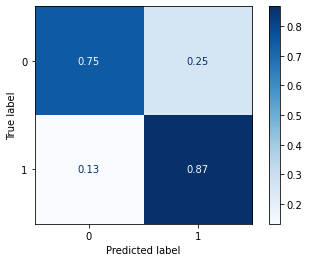

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,final_knn_test_preds, cmap = 'Blues',normalize='true');

This model is similar to the base model above showing that there are 25% false positives and 13% False negatives. 13% is material if the HeartDisease is not diagnosed on time. Comparing this model to the base KNN model, the number of false negatives increased by 3%. This means the model predicts more false negative results regarding the presence of HeartDisease than the base model. The number of false positives decreased by 1% but this prediction can be improved upon with more data for training the model.

# **Applying PCA to the KNN Model**

In [ ]:
# Instantiate, fit & transform data using PCA
pca = PCA(n_components=.95)

orion = make_pipeline(column_transformer, pca)

Applying PCA to KNN Model

In [ ]:
#To apply PCA to the best parameters for the KNN model
scorpio = KNeighborsClassifier(n_neighbors = 9, p = 2, weights = 'uniform')
KNN_pca_pipe = make_pipeline(orion,scorpio)
KNN_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
                                 ('pca', PCA(n_components=0.95))])),
     

In [ ]:
#To predict KNN model with PCA
train_preds_pca = KNN_pca_pipe.predict(X_train)
test_preds_pca = KNN_pca_pipe.predict(X_test)

In [ ]:
# Evaluate KNN PCA model
print('Accuracy of Train set', accuracy_score(y_train, train_preds_pca))
print('Accuracy of Test set', accuracy_score(y_test, test_preds_pca))

Accuracy of Train set 0.877906976744186
Accuracy of Test set 0.8217391304347826


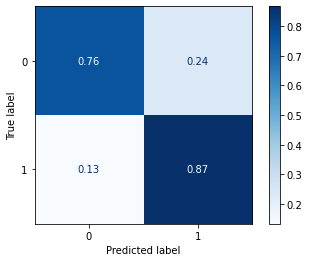

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,test_preds_pca, cmap = 'Blues', normalize='true');

This model is similar to the base model above showing that there are 24% false positives and 13% False negatives. 13% is material if the HeartDisease is not diagnosed on time. Comparing this model to the base KNN model, the number of false negatives increased by 3%. This means the model predicts more false negative results regarding the presence of HeartDisease than the base model. The number of false positives decreased by 2% but this prediction can be improved upon with more data for training the model.

# **Using the Decision Tree Model**

In [ ]:
#Instantiate the model
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
#To make pipeline and including the column transformer
dec_tree_pipe = make_pipeline(column_transformer, dec_tree)

#Fit pipeline on training data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [ ]:
# Predict Dec Tree model
%%time
dec_tree_train_preds = dec_tree_pipe.predict(X_train)
dec_tree_test_preds = dec_tree_pipe.predict(X_test)

CPU times: user 16.4 ms, sys: 0 ns, total: 16.4 ms
Wall time: 16.6 ms


In [ ]:
# Evaluate default Decision Tree model 
print('Accuracy of Train set', accuracy_score(y_train, dec_tree_train_preds))
print('Accuracy of Test set', accuracy_score(y_test, dec_tree_test_preds))

Accuracy of Train set 0.8241279069767442
Accuracy of Test set 0.782608695652174


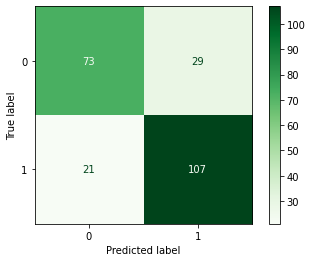

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,dec_tree_test_preds, cmap = 'Greens');

This model is similar to the base Decision Tree model above showing that there are 29% false positives and 21% False negatives. 21% is material if the HeartDisease is not diagnosed on time. This model also predicts more false negative results regarding the presence of HeartDisease than the KNN base model. The number of false positives increased by 3% and the false negative results increased by 11% as compared to the KNN model. This prediction can be improved upon with more data for training the model.

# **To Hypertune the Decision Tree Classifier Model**

In [ ]:
#To see the hyperparameters available and to define them within a pipeline
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
  ('decisiontreeclassifier',
   DecisionTreeClassifier(max_depth=2, random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                 

In [ ]:
#Define hyperparameters to be tested
dec_tree_params = {'decisiontreeclassifier__max_depth': [1,6],
              'decisiontreeclassifier__min_samples_leaf': [1,15,20],
              'decisiontreeclassifier__min_samples_split': [2, 10, 100]}


In [ ]:
#Instantiate the Gridsearch with the Decision Tree pipeline
gs_dec_tree = GridSearchCV(dec_tree_pipe, dec_tree_params)
gs_dec_tree.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
                                       ('decision

In [ ]:
#To find hyperparameter with best results
print(gs.best_params_)
gs.best_estimator_

{'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0def3b84d0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0def051e50>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [ ]:
#To see which hyperparameters gave the best results
print('Best Decision Parameters:')
print(gs.best_params_)
best_dt_pipe = gs.best_estimator_
print(f'Accuracy of best DT model is: {best_dt_pipe.score(X_test, y_test)}')

Best Decision Parameters:
{'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Accuracy of best DT model is: 0.782608695652174


In [ ]:
#Instantiate final Decision Tree Model
final_dec_tree = DecisionTreeClassifier(max_depth=1, min_samples_leaf = 1, min_samples_split= 2, random_state=42)
final_dec_tree_pipe = make_pipeline(column_transformer,final_dec_tree)

#fitting the final model
final_dec_tree_pipe.fit(X_train,y_train)

# Predict final Decision Tree model

final_dec_tree_train_preds = final_dec_tree_pipe.predict(X_train)
final_dec_tree_test_preds = final_dec_tree_pipe.predict(X_test)

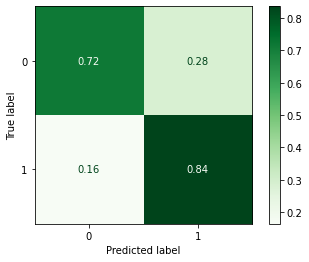

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,final_dec_tree_test_preds, cmap = 'Greens', normalize='true');

This model is similar to the base Decision Tree model above showing that there are 28% false positives and 16% False negatives. 16% is still material if the HeartDisease is not diagnosed on time. This model also predicts more false negative results regarding the presence of HeartDisease than the KNN base model. The number of false positives increased by 2% and the false negative results increased by 16% as compared to the KNN model. This prediction can be improved upon with more data for training the model.

# **Applying PCA to Decision Tree Classifier**

In [ ]:
#To apply PCA to the best parameters for the Decision tree model
Taurus = DecisionTreeClassifier(max_depth=1, min_samples_leaf = 1, min_samples_split= 2, random_state=42)
dec_tree_pca_pipe = make_pipeline(orion,Taurus)
dec_tree_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
                                 ('pca', PCA(n_components=0.95))])),
     

In [ ]:
#To predict Decision Tree model with PCA
dec_tree_train_preds_pca = dec_tree_pca_pipe.predict(X_train)
dec_tree_test_preds_pca = dec_tree_pca_pipe.predict(X_test)

In [ ]:
# Evaluate Decision Tree PCA model
print('Accuracy of Train set', accuracy_score(y_train, dec_tree_train_preds_pca))
print('Accuracy of Test set', accuracy_score(y_test, dec_tree_test_preds_pca))

Accuracy of Train set 0.7950581395348837
Accuracy of Test set 0.7304347826086957


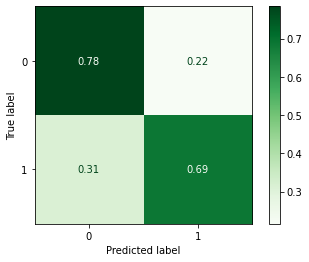

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,dec_tree_test_preds_pca, cmap = 'Greens', normalize= 'true');

This model is showing that there are 22% false positives and 31% False negatives. With 31% being a material number if the HeartDisease is not diagnosed on time. This model predicts more false negative results regarding the presence of HeartDisease than the KNN base model. The number of false negative results decreased by 5 as compared to the Tuned Decision Tree model. This prediction can be improved upon with more data for training the model.

# **Random Forest Classifier**

In [ ]:
#Instantiate RandomRegressor Model
rf = RandomForestClassifier(random_state=42)
rf_pipe = make_pipeline(column_transformer,rf)

#fitting the base model
rf_pipe.fit(X_train,y_train)

# Predict Dec Tree model

rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

In [ ]:
# Evaluate default random forest model 
print('Accuracy of Train set', accuracy_score(y_train, rf_train_preds))
print('Accuracy of Test set', accuracy_score(y_test, rf_test_preds))

Accuracy of Train set 1.0
Accuracy of Test set 0.8304347826086956


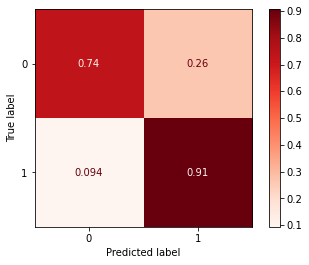

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,rf_test_preds, cmap = 'Reds', normalize='true');

This model is showing that there are 26% false positives and 9% False negatives. 9% of false negative predictions is material if the HeartDisease is not diagnosed on time. This model predicts less false negative results than the KNN base model. This model is better than the KNN model. Even though this number has reduced, more data and training of the model can reduce the amount of false negatives regarding the presence of HeartDisease

# **Hypertuning Random Forest Model**

In [ ]:
#To find the available parameters for the random forest model
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                 ('onehotencoder'

In [ ]:
#Define Hyperparameters to be tested
rf_params = {'randomforestclassifier__n_estimators' : range(10,50),
             'randomforestclassifier__min_samples_leaf' : range(1,5),
             'randomforestclassifier__max_depth' : range(1,10)}

In [ ]:
#Instantiate the Gridsearch with the Random Forest pipeline
gs_rf = GridSearchCV(rf_pipe, rf_params)
gs_rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
                                       ('randomfo

In [ ]:
#To find hyperparameter with best results
print(gs_rf.best_params_)
gs_rf.best_estimator_

{'randomforestclassifier__max_depth': 7, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 42}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deafda790>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deafda990>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=7, min_samples_leaf=2,
                                        n_estimators=42, random_state=42))])

In [ ]:
#To see which hyperparameters gave the best results
print('Best random forest Parameters:')
print(gs_rf.best_params_)
best_rf_pipe = gs_rf.best_estimator_
print(f'Accuracy of best RF model is: {best_rf_pipe.score(X_test, y_test)}')


Best random forest Parameters:
{'randomforestclassifier__max_depth': 7, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__n_estimators': 42}
Accuracy of best RF model is: 0.8391304347826087


In [ ]:
#Instantiate final RandomRegressor Model
final_rf = RandomForestClassifier(max_depth=7, min_samples_leaf = 2, n_estimators = 42, random_state=42)
final_rf_pipe = make_pipeline(column_transformer,final_rf)

#fitting the final model
final_rf_pipe.fit(X_train,y_train)

# Predict final random forest model

final_rf_train_preds = final_rf_pipe.predict(X_train)
final_rf_test_preds = final_rf_pipe.predict(X_test)

In [ ]:
#To print accuracy score of the final random forest model
print('Accuracy of Train set', accuracy_score(y_train, final_rf_train_preds))
print('Accuracy of Test set', accuracy_score(y_test, final_rf_test_preds))

Accuracy of Train set 0.9331395348837209
Accuracy of Test set 0.8391304347826087


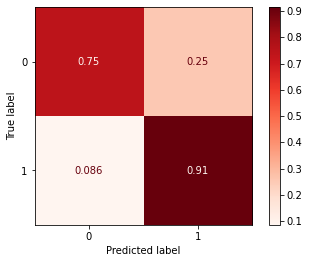

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,final_rf_test_preds, cmap = 'Reds', normalize='true');

This model is showing that there are 25% false positives and 9% False negatives. With 9% being a material percentage if the HeartDisease is not diagnosed on time. This model predicts less false negative results than the RandomForest base model. This model is better than the KNN model as model. Even though this number has reduced, more data and training of the model can reduce the amount of false negatives regarding the presence of HeartDisease

# **Applying PCA to Random Forest Classifier**

In [ ]:
#Applying PCA to the best parameters for the Random Forest model
Pisces = RandomForestClassifier(max_depth=7, min_samples_leaf = 2, n_estimators = 42, random_state=42)
rf_pca_pipe = make_pipeline(orion,Pisces)
rf_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139910>),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f0deb139410>)])),
                                 ('pca', PCA(n_components=0.95))])),
     

In [ ]:
#To predict results for the best random forest model with PCA
rf_train_preds_pca = rf_pca_pipe.predict(X_train)
rf_test_preds_pca = rf_pca_pipe.predict(X_test)

In [ ]:
# Evaluate random forest PCA model
print('Accuracy of Train set', accuracy_score(y_train, rf_train_preds_pca))
print('Accuracy of Test set', accuracy_score(y_test, rf_test_preds_pca))

Accuracy of Train set 0.9636627906976745
Accuracy of Test set 0.8304347826086956


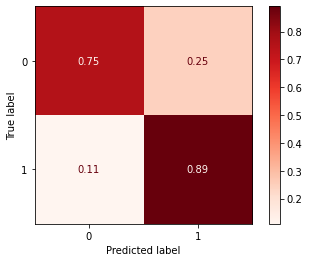

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,rf_test_preds_pca, cmap = 'Reds', normalize ='true');

This model is showing that there are 25% false positives and 11% False negatives. 11% false negative prediction is material if the HeartDisease is not diagnosed on time. This model predicts less false negative results than the KNN base model. This model is worse at predicting False Negative results than final random forest model by 3%. Again, more data and training of the model can reduce the amount of false negatives regarding the presence of HeartDisease

# **Best Model**

In [ ]:
#Instantiate final RandomRegressor Model
best_model = RandomForestClassifier(max_depth=7, min_samples_leaf = 2, n_estimators = 42, random_state=42)
best_model_pipe = make_pipeline(column_transformer,best_model)

#fitting the final model
best_model_pipe.fit(X_train,y_train)

# Predict final random forest model

best_model_train_preds = best_model_pipe.predict(X_train)
best_model_test_preds = best_model_pipe.predict(X_test)



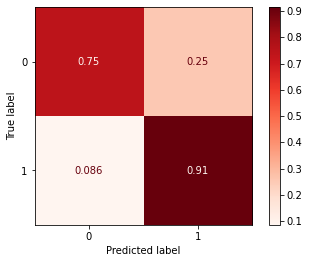

In [ ]:
#Using Confusion matrix to display predictions
ConfusionMatrixDisplay.from_predictions(y_test,best_model_test_preds, cmap = 'Reds', normalize='true');

# **Summary**

False negatives are the most important metrics to consider with this project. This is because results showing that a patient is negative for HeartDisease when they are actually positive can be problematic. This can cause patients with HeartDisease to have a delay in treatment which can put their lives at risk. With that being said, the best model with the best results in predicting false negatives is the final random forest model which has a false negative prediction of 9%. This model may be useful in production but I think 9% is still a high percentage of false negatives and is material to the quality of results you want to provide to patients as it can be life threatening.This prediction can however, be reduced by adding more data to train the model to possibly get the prediction results lower than 5% or. Adding some more features or removing some of the attributes after talking to a subject matter expert is also another recommendation.